# Pendekatan Unsupervised Learning
Teknik ini melakukan pembelajaran mesin tanpa menggunakan data latih. Jadi sistem mempelajari *unlabeled data* dan mengelompokkannya berdasarkan fitur-fitur dari data tersebut.

Algoritma unsupervised learning bertujuan untuk mengelompokkan objek yang hampir sama dalam suatu ares tertentu. Sebagai contoh, jika kita ingin mengelompokkan karakteristik customer sebuah perusahaan berdasarkan kemiripan sifat dalam hal usia, pendidikan dan hobi. Untuk mengelompokkan customer berdasarkan kemiripan sifat tersebut tentunya tidak diperlukan data latih terlebih dahulu. Beberapa algoritma yang dapat digunakan dalam *unsupervised learning* adalah metode *hierarchical clustering,* K-Means, DBSCAN, Fuzzy C-Means, Self-Organizing Map, dan lain sebagainya. Khusus untuk studi kasus pada kali ini akan mencoba menerapkan K-Means, DBSCAN dan Fuzzy C-Means.

# K-Means
## Tentang Algoritma K-Means
Algoritma K-Means merupakan salah satu jenis clustering. Clustering merupakan sebuah proses mengelompokkan data ke dalam beberapa cluster atau kelompok, dimana masing-masing kelompok memiliki tingkatan kemiripan maksimum.

Seperti algoritma *unsupervised* lainnya, algoritma K-means menerima masukan berupa data tanpa label kelas. Algoritma K-Means mengelompokkan data-data ke dalam k kelompok, dimana kelompok tersebut dibentuk dengan meminimalkan jumlah dari *euclidean distances* diantara data dengan titik pusat (*centroid*) yang merepresentasikan *cluster* atau kelompok tersebut.

Menurut Tan et al. (2005), berikut tahapan-tahapan dalam algoritma K-Means clustering:
1. Menentukan jumlah *cluster* K dari dataset yang akan dibagi.
2. Menentukan data k yang menjadi titik pusat atau *centroid* awal lokasi klaster
3. Mengelompokkan data ke dalam K *cluster* sesuai dengan titik centroid terdekat yang telah ditentukan sebelumnya
4. Memperbarui nilai titik centroid dan mengulangi langkah 3 sampai nilai dari titik centroid tersebut tidak berubah.

Sesuai dengan langkah di atas, maka pengelompokkan data dilakukan dengan cara menghitung jarak terdekat data ke *centroid* sehingga akhirnya membentuk sebuah cluster. Berikut adalah formula yang digunakan untuk menghitung jarak tersebut (Maimon et al. (2005):

![menghitung-jarak.jpg](menghitung-jarak.jpg)

Dimana:<br>
$g = 1 $, untuk menghitung jarak Manhattan<br>
$g = 2 $, untuk menghitung jarak Euclidean<br>
$ x _i, x _j $ adalah dua buah data yang akan dihitung jaraknya<br>
$p = $ dimensi dari sebuah data

Selanjutnya pembaharuan suatu titik centroid dapat dilakukan dengan formula berikut:

$ \mu _k = \frac{1}{N _k} \sum \limits _{q=1} ^{N _k} xq $

Dimana :

$ \mu _k = $ titik *centroid* dari cluster ke-K<br>
$ N _k = $ banyaknya data pada cluster ke-K<br>
$ X _q = $ data ke-q pada cluster ke-K

Secara umum, K-means memiliki beberapa kelebihan seperti mudah diimplementasikan, efisiensi waktu pembelajaran serta mudah untuk diadaptasi. Tetapi metode ini juga memiliki beberapa kekurangann seperti masalah *curse of dimensionality* yang dapat terjadi jika data pelatihan memiliki dimensi yang sangat tinggi.

## Studi Kasus
Sebuah perusahaan melakukan penelitian terhadap data-data konsumen yang dimilikinya. Perusahaan tersebut akan melakukan pengelompokkan data ke dalam beberapa *cluster* berdasarkan kriteria besaran gaji yang diterima dan pengeluaran per bulannya.

Studi kasus kali ini akan melakukan clustering terhadap data-data konsumen ke dalam beberapa kelomoik, dimana masing-masing kelompok memiliki tingkat kemiripan maksimum. Tujuan penelitian ini adalah agar perusahaan dapat memetakan jenis produk yang sesuai dengan karakteristik konsumen.

## Kode Program
### 1. Memanggil library yang dibutuhkan.
* Matplotlib, yaitu library yang digunakan untuk membuat grafik plot sesuai kebutuhan.
* NumPy, digunakan untuk kebutuhan scientific.
* Pandas, yaitu library yang digunakan untuk manipulasi data seperti membuat tabel, mengubah dimensi data, mengecek data dan sebagainya.
* Sklearn, adalah library untuk berbagai metode dan algoritma yang digunakan dalam *machine learning.*

In [1]:
# Import library yang akan digunakan
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

### 2. Memanggil dataset.


In [2]:
# Menyiapkan data dan memanggil dataset
dataset = pd.read_csv('konsumen.csv', sep=';')
dataset.keys()

Index(['No', 'Gaji', 'Pengeluaran'], dtype='object')

In [3]:
dataku = pd.DataFrame(dataset)
dataku = dataku.drop(columns=['No'])
dataku.head()

,Gaji,Pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


### 3. Konversi Dataset ke Data Array
perlu dilakukan konversi dataset ke dalam tipe data *array*

In [4]:
# Konversi ke data array
X = np.asarray(dataku)
print(X)

[[ 2500  1750]
 [ 3800  4200]
 [ 3900  3800]
 [ 4350  5500]
 [ 4400  3200]
 [ 5500  5450]
 [ 5600  5950]
 [ 5750  4100]
 [ 6850  6050]
 [ 6900  8500]
 [ 7250  9500]
 [ 7350  6050]
 [ 7500  8500]
 [ 7800  9500]
 [ 8200  8300]
 [ 8500  6500]
 [ 8550  8400]
 [ 8750  6000]
 [ 9100 10500]
 [ 9100  8500]]


### 4. Menampilkan Data Array ke dalam Scatter Plot

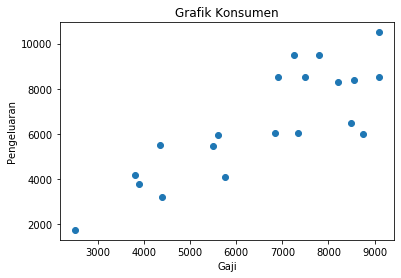

In [5]:
# Menampilkan data dalam bentuk scatter plot
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

### 5. Mengaktifkan K-Means dari Sklearn
perlu dilakukan konversi dataset ke dalam tipe *array,* dan kemudian melakukan fiting data

In [6]:
# Mengaktifkan K Means dengan jumlah
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 6. Menampilkan nilai Centroid
Perintah di bawah ini digunakan untuk menampilkan nilai *centroid* atau titik pusat klaster yang di *generate* oleh algoritma.

In [7]:
# Menampilkan nilai centroid yang di generate oleh algorithm
print(kmeans.cluster_centers_)

[[4475.   4243.75]
 [7987.5  8025.  ]]


Bisa juga menampilkan output dari algoritma, yaitu label dari data point hasil *clustering*

In [8]:
# Menampilkan label data point
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


### 7. Visualisasi Hasil
menampilkan scatter plot dari data-data setela dilakukan klasterisasi oleh algoritma.

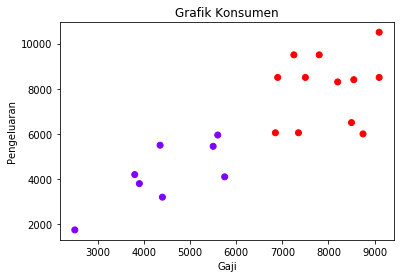

In [9]:
# Plot data point
# Memvisualisasikan bagaimana telah di klasterisasi.
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

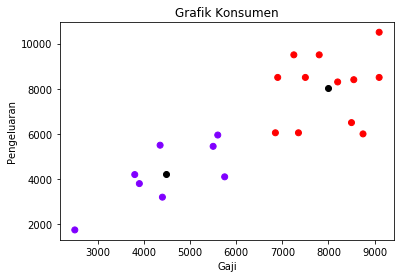

In [10]:
# Plot data point
# Memvisualisasikan bagaimana telah di klasterisasi
# Menampilkan centroids dengan warna hitam.
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

# DBSCAN
## Tentang DBSCAN
Sama seperti K-Means, Algoritma *Density Based Spatial Clustering of Application with Noise* atau yang biasa disebut DBSCAN juga merupakan salah satu algoritma berbasis *clustering.* Tetapi berbeda dengan K-Means yang melakukan pembentukan klaster dengan perhitungan jarak terdekat dengan centroid, DBSCAN membuat klaster berdasarkan tingkat kerapatan data, maka disebut sebagai *density-based.*

Algoritma DBSCAN mengkategorikan daerah yang memiliki kerapatan tinggi menjadi *cluster-cluster* yang ditemukan dalam bentuk bebas dengan memanfaatkan *noise.* Noise sendiri mewakili daerah yang kurang padat yang digunakan untuk memisahkan antara cluster satu dengan cluster lainnya.

Berikut adalah langkah-langkah pada algoritma DBSCAN (Devi, 2014).<br>
a. Tahap pertama adalah melakukan inisialisai parameter *minpts* dan *eps*.
* **MinPts** adalah minimal titik dalam cluster yang ditentukan pengguna.
* **Eps** adalah radius atau nilai ambang batas.

b. Selanjutnya secara acak menentukan titik awal atau **p**.<br>
c. Hitung **eps** atau semua jarak titik yang *density reachable* terhadap **p**.<br>
d. Melakukan pengecekan bahwa jika titik yang memenuhi **eps** lebih dari **minpts** maka titik p adalah *core point* (titik pusat cluster berdasarkan densitas). Disinilah pembentukan cluster dilakukan.<br>
e. Jika p adalah *border point* (titik yang menjadi batasan wilayah suatu titik pusat) dan tidak titik yang *density reachable* terhadap **p**, maka proses dilanjutkan ke titik yang lain<br>
Catatan: sebuah titik dikatakan *reachable* apabila titik tersebut terhubung secara tidak langsung dengan titik pusat.<br>
f. Ulangi langkah c sampai dengan e di atas sehingga semua titik telah diproses.

## Studi Kasus
Kali ini akan dilakukan clustering terhadap data-data bunga iris tersebut dengan menggunakan algoritma DBSCAN.

## Kode Program
### 1. Memanggil library yang dibutuhkan.
Library yang digunakan pada kasus ini adalah
* Sklearn, adalah library untuk berbagai metode dan algoritma yang digunakan untuk memanggik DBSCAN.
* Matplotlib, yaitu library yang digunakan untuk membuat grafik plot sesuai kebutuhan

In [11]:
# Memanggil library yang digunakan
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

## 2. Memanggil dataset
bisa juga melihat *methods* dan *features* dalam dataset

In [12]:
# Memanggil datasets IRIS
bunga = datasets.load_iris()

# Melihat method dalam dataset
print(dir(bunga))

# Melihat Features dalam dataset
print(bunga.feature_names)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
# Nama Target
print(bunga.target_names)

['setosa' 'versicolor' 'virginica']


## 3. Visualisasi data dengan Scatter Plot

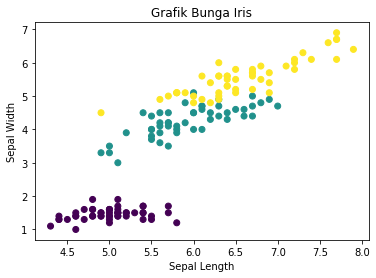

In [14]:
# Membagi data untuk sumbu X dan Y
x_axis = bunga.data[:, 0] # Sepal Length
y_axis = bunga.data[:, 2] # Sepal Width

# Menampilkan data
plt.scatter(x_axis, y_axis, c=bunga.target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Grafik Bunga Iris")
plt.show()

## 4. Mengaktifkan DBSCAN dari Sklearn

In [15]:
# Menggunakan Model DBSCAN
dbscan = DBSCAN()

# Fitting data
dbscan.fit(bunga.data)

# Transformasi menggunakan PCA 2 D
pca = PCA(n_components=2).fit(bunga.data)
pca_2d = pca.transform(bunga.data)

## 5. Visualisasi hasil
menampilkan scatter plot dari data-data setelah dilakukan klasterisasi olen algoritma DBSCAN.

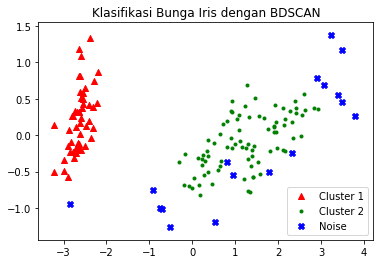

In [16]:
# Visualisasi dengan sclatter plot
# Memberi label market
label = {0: 'red', 1:'blue', 2:'green'}

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='^')
    elif dbscan.labels_[i] == 1:
        cluster2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='.')
    elif dbscan.labels_[i] == -1:
        noise = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='X')
        
# Memberikan legend dan judul
plt.legend([cluster1, cluster2, noise], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('Klasifikasi Bunga Iris dengan BDSCAN')

# Menampilkan hasil
plt.show()